## T-test and Graph: FIFO 
This uses the pkl outputs from the salabim and slurmtrain notebooks

In [139]:
import numpy as np
import pandas as pd
from pathlib import Path
from scipy import stats
import re

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from astropy.visualization import hist

%matplotlib inline

In [140]:
import matplotlib.pylab as pylab

# size: Either a relative value of 'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large' 
#     or an absolute font size, e.g., 10. Default: rcParams["font.size"] (default: 10.0)

params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [141]:
# Setup Paths
path_slurmtrain = Path(r"/home/overlytic/thesis/notebooks/slurm_train/output/sacct")
path_slurmsim = Path(r"/mnt/wsl/instances/Ubuntu-18.04//home/slurm/slurm_sim_ws/slurm_sim_tools/slurm_batches/simple_traces/srun")

In [142]:
# Parameters

myrun_type = "fiforun"
myrun_shortname = "fiforun_2jt-run30-rho60"
# myrun_savepath = Path('.') / myrun_type / myrun_shortname

metrics = ['min', 'max',  'std', 'mean']
metric_names = ['min', 'max', '$s_{dev}$', 'average']

# print(f"Output folder: {myrun_savepath}")

In [143]:
# Paths
thesis_path = Path(".")
save_image_path = thesis_path / "images" / "results"
save_data_path = thesis_path / "images" / "data"

In [144]:
# Helper functions

def extract_run_num(f, run_type):
    """
    f : string filename e.g. srun8_fiforun_2jt-run30-rho60-run10_slurmtrain_dfacct
    Result : '10' on error return -1
    """
    run_search = re.search(f".*-run(.*)_{run_type}.*.pkl", f)
    
    run = -1 # default
    
    if run_search:
        srun = run_search.group(1)
        
        if srun.isdigit():
            run = int(srun)
        
    return run

# Get Slurmtrain dfacct for all runs

strain_search_string = f'*{myrun_shortname}-run*slurmtrain*dfacct.pkl'
strain_dfacct_all = list(save_data_path.glob(strain_search_string))

if strain_dfacct_all:
    # Extract run numbers
    strain_run_nums_all = [extract_run_num(p.name, 'slurmtrain') for p in strain_dfacct_all]
    # Sort paths based on valid run numbers
    ind_sort = np.argsort(strain_run_nums_all)
    ind_sort_valid = [ind_sort[i] for i, value in enumerate(strain_run_nums_all) if value > 0]
    strain_run_nums = [strain_run_nums_all[i] for i in ind_sort_valid]
    strain_dfacct_sorted = [strain_dfacct_all[i] for i in ind_sort_valid]
    print(f"slurmtrain run nums: {strain_run_nums}")
    for x in strain_dfacct_sorted: print(x)
else:
    print(f"No files found for search string: {strain_search_string}")

slurmtrain run nums: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
images/data/srun8_fiforun_2jt-run30-rho60-run1_slurmtrain_dfacct.pkl
images/data/srun8_fiforun_2jt-run30-rho60-run2_slurmtrain_dfacct.pkl
images/data/srun8_fiforun_2jt-run30-rho60-run3_slurmtrain_dfacct.pkl
images/data/srun8_fiforun_2jt-run30-rho60-run4_slurmtrain_dfacct.pkl
images/data/srun8_fiforun_2jt-run30-rho60-run5_slurmtrain_dfacct.pkl
images/data/srun8_fiforun_2jt-run30-rho60-run6_slurmtrain_dfacct.pkl
images/data/srun8_fiforun_2jt-run30-rho60-run7_slurmtrain_dfacct.pkl
images/data/srun8_fiforun_2jt-run30-rho60-run8_slurmtrain_dfacct.pkl
images/data/srun8_fiforun_2jt-run30-rho60-run9_slurmtrain_dfacct.pkl
images/data/srun8_fiforun_2jt-run30-rho60-run10_slurmtrain_dfacct.pkl


In [145]:
salabim_search_string = f'*{myrun_shortname}-run*dfjobs.pkl'
salabim_dfjobs_paths = list(save_data_path.glob(salabim_search_string))

if salabim_dfjobs_paths:
    # Extract run numbers
    salabim_run_nums_all = [extract_run_num(p.name, 'salabim') for p in salabim_dfjobs_paths]
    # Sort paths based on valid run numbers
    ind_sort = np.argsort(salabim_run_nums_all)
    ind_sort_valid = [ind_sort[i] for i, value in enumerate(salabim_run_nums_all) if value > 0]
    salabim_run_nums = [salabim_run_nums_all[i] for i in ind_sort_valid]
    salabim_dfjobs_sorted = [salabim_dfjobs_paths[i] for i in ind_sort_valid]
    print(f"salabim run numbers: {salabim_run_nums}")
    for x in salabim_dfjobs_sorted: print(x)
else:
    print(f"No files found for search string: {salabim_search_string}")

salabim run numbers: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
images/data/srun8_fiforun_2jt-run30-rho60-run1_salabim_dfjobs.pkl
images/data/srun8_fiforun_2jt-run30-rho60-run2_salabim_dfjobs.pkl
images/data/srun8_fiforun_2jt-run30-rho60-run3_salabim_dfjobs.pkl
images/data/srun8_fiforun_2jt-run30-rho60-run4_salabim_dfjobs.pkl
images/data/srun8_fiforun_2jt-run30-rho60-run5_salabim_dfjobs.pkl
images/data/srun8_fiforun_2jt-run30-rho60-run6_salabim_dfjobs.pkl
images/data/srun8_fiforun_2jt-run30-rho60-run7_salabim_dfjobs.pkl
images/data/srun8_fiforun_2jt-run30-rho60-run8_salabim_dfjobs.pkl
images/data/srun8_fiforun_2jt-run30-rho60-run9_salabim_dfjobs.pkl
images/data/srun8_fiforun_2jt-run30-rho60-run10_salabim_dfjobs.pkl


In [146]:
def calc_strain_wait(sacct_df):
    
    sacct_df.pe_req = sacct_df.pe_req.round(0).astype(int)
    
    wait_table = (sacct_df
     .loc[:, ['Account', 'JobName', 'pe_req', 'wait_time', 'elapsed_time']]
     .assign(job_prio =
             lambda x: np.select([x.Account == "training", x.Account=="crucial"],
                                 [1, 10]))
     .rename(columns = {'elapsed_time':'run_time',
                        'pe_req': 'job_pe_req',
                        'JobName' : 'job_number'})
     .groupby(['job_prio', 'job_pe_req'])
      .agg({
           "wait_time": ["mean"],
           "run_time" : ["mean"],
           "job_number" : ["count"] #,
           # "backfill" : ["sum"]
            })
     .reset_index()
    )
    
    wait_table.columns = wait_table.columns.map("_".join).str.strip('_')
    
    return wait_table

# # # Test:
# sacct_df = pd.read_pickle(strain_dfacct_sorted[0], compression='infer')
# w_strain = calc_strain_wait(sacct_df)
# w_strain

In [147]:
def calc_sala_wait(df_jobs):
    
    df_jobs.job_pe_req = df_jobs.job_pe_req.round(0).astype(int)
    
    wait_table = (df_jobs
    #      .merge(df_job_idx, on="job_name", how="inner")
                  .loc[:, ['job_number', 'job_pe_req', 
                           'job_prio', 'wait_time', 'run_time', 
                           'backfill']]
                  .groupby(['job_prio', 'job_pe_req'])
                  .agg({
           "wait_time": ["mean"],
           "run_time" : ["mean"],
#            "job_pe_req" : ["mean"],
           "job_number" : ["count"],
           "backfill" : ["sum"]
            })
     .reset_index())

    wait_table.columns = wait_table.columns.map("_".join).str.strip('_')

    return(wait_table)
    
# # Test
# df_jobs = pd.read_pickle(salabim_dfjobs_sorted[0])
# w_sala = calc_sala_wait(df_jobs)
# w_sala

In [148]:
# Add dfpetime files:

def change_path_filename(x, from_file="dfacct.pkl", to_file = "dfpetime.pkl"):
    str_path = str(x).replace(from_file, to_file)
    new_path = Path(str_path)
    return new_path

strain_dfpetime_sorted =  [change_path_filename(x, "dfacct.pkl", "dfpetime.pkl")
                           for x in strain_dfacct_sorted]

salabim_dfpetime_sorted = [change_path_filename(x, "dfjobs.pkl", "dfpetime.pkl") 
                           for x in salabim_dfjobs_sorted]

display(strain_dfpetime_sorted[0])
display(f"All Exists: {all([x.exists() for x in strain_dfpetime_sorted])}")
display(salabim_dfpetime_sorted[0])
display(f"All Exists: {all([x.exists() for x in salabim_dfpetime_sorted])}")

# TODO: READ IN AND PLOT THE JITTER FOR ALL THE PATHS

PosixPath('images/data/srun8_fiforun_2jt-run30-rho60-run1_slurmtrain_dfpetime.pkl')

'All Exists: True'

PosixPath('images/data/srun8_fiforun_2jt-run30-rho60-run1_salabim_dfpetime.pkl')

'All Exists: True'

In [149]:
# Read SlurmTrain Runs and make table with wait times

strain_lst_wait = []

num_runs = len(strain_run_nums)

load_bf = False
list_sacct = strain_dfacct_sorted
list_petime = strain_dfpetime_sorted
list_bf = None

dic_st_sacct = {}
dic_st_petime = {}
dic_st_bfdata = {}

for i in range(num_runs):
    
    # SAcct
    sacct_path = list_sacct[i]
    df_sacct = pd.read_pickle(sacct_path)
    dic_st_sacct[i] = df_sacct
    
    # PE Time
    petime_path = list_petime[i]
    df_petime = pd.read_pickle(petime_path)    
    dic_st_petime[i] = df_petime
    
    # BF Info
    if load_bf:
        bf_path = list_bf[i]
        dic_bf = pd.read_pickle(bf_path)   # FIX THIS
        dic_st_bfdata[i] = dic_bf
    
    # Calc Wait Time
    strain_wait = calc_strain_wait(df_sacct)        
    
    if load_bf: 
        strain_wait['Total_run_backfills'] = dic_bf['backfill_count']
    else: 
        strain_wait['Total_run_backfills'] = 0
        
    strain_wait['RunNum'] = i+1    
    strain_wait['RunType'] = 'slurmtrain'
    strain_wait['SchedType'] = 'Priority'
    
    strain_lst_wait.append(strain_wait)
    
df_wait_strain = pd.concat(strain_lst_wait)

df_wait_strain.head(10)

,job_prio,job_pe_req,wait_time_mean,run_time_mean,job_number_count,Total_run_backfills,RunNum,RunType,SchedType
0,1,1,2.254902,25.803922,102,0,1,slurmtrain,Priority
1,1,3,6.183673,26.020408,98,0,1,slurmtrain,Priority
0,1,1,2.319588,30.876289,97,0,2,slurmtrain,Priority
1,1,3,9.407767,26.155340,103,0,2,slurmtrain,Priority
0,1,1,4.634409,22.752688,93,0,3,slurmtrain,Priority
1,1,3,11.831776,27.672897,107,0,3,slurmtrain,Priority
0,1,1,3.361111,33.870370,108,0,4,slurmtrain,Priority
1,1,3,4.804348,31.597826,92,0,4,slurmtrain,Priority
0,1,1,7.965517,31.459770,87,0,5,slurmtrain,Priority
1,1,3,10.672566,29.982301,113,0,5,slurmtrain,Priority


In [150]:
# Read SlurmTrain FIFO Runs and make table with wait times

sala_lst_wait = []

num_runs = len(salabim_run_nums)

list_jobs = salabim_dfjobs_sorted
list_petime = salabim_dfpetime_sorted

dic_sala_dfjobs = {}
dic_sala_petime = {}

for i in range(num_runs):
    
    # SAcct
    dfjobs_path = list_jobs[i]
    df_jobs = pd.read_pickle(dfjobs_path)
    dic_sala_dfjobs[i] = df_jobs
    
    # PE Time
    petime_path = list_petime[i]
    df_petime = pd.read_pickle(petime_path)    
    dic_sala_petime[i] = df_petime
        
    # Calc Wait Time
    sala_wait = calc_sala_wait(df_jobs)
        
    sala_wait['Total_run_backfills'] = sala_wait.backfill_sum.sum()
        
    sala_wait['RunNum'] = i+1
    sala_wait['RunType'] = 'salabim'
    sala_wait['SchedType'] = 'FIFO'
    
    
    sala_lst_wait.append(sala_wait)
    
df_wait_sala = pd.concat(sala_lst_wait)

df_wait_sala.head(10)

,job_prio,job_pe_req,wait_time_mean,run_time_mean,job_number_count,backfill_sum,Total_run_backfills,RunNum,RunType,SchedType
0,1,1,1.490196,25.666667,102,0,0,1,salabim,FIFO
1,1,3,5.367347,25.765306,98,0,0,1,salabim,FIFO
0,1,1,1.701031,30.639175,97,0,0,2,salabim,FIFO
1,1,3,8.640777,25.932039,103,0,0,2,salabim,FIFO
0,1,1,3.892473,22.591398,93,0,0,3,salabim,FIFO
1,1,3,11.046729,27.448598,107,0,0,3,salabim,FIFO
0,1,1,2.574074,33.666667,108,0,0,4,salabim,FIFO
1,1,3,4.271739,31.369565,92,0,0,4,salabim,FIFO
0,1,1,7.218391,31.321839,87,0,0,5,salabim,FIFO
1,1,3,9.884956,29.805310,113,0,0,5,salabim,FIFO


In [151]:
# Combine data from the salabim and strain

df_wait_combo = pd.concat([df_wait_strain, df_wait_sala])

df_wait_combo_test = (df_wait_combo
                     .set_index(['job_prio','job_pe_req','RunNum','RunType'])
                     .sort_index()
                     .reset_index())

df_wait_combo_test.head(10)

,job_prio,job_pe_req,RunNum,RunType,wait_time_mean,run_time_mean,job_number_count,Total_run_backfills,SchedType,backfill_sum
0,1,1,1,salabim,1.490196,25.666667,102,0,FIFO,0.0
1,1,1,1,slurmtrain,2.254902,25.803922,102,0,Priority,NaN
2,1,1,2,salabim,1.701031,30.639175,97,0,FIFO,0.0
3,1,1,2,slurmtrain,2.319588,30.876289,97,0,Priority,NaN
4,1,1,3,salabim,3.892473,22.591398,93,0,FIFO,0.0
5,1,1,3,slurmtrain,4.634409,22.752688,93,0,Priority,NaN
6,1,1,4,salabim,2.574074,33.666667,108,0,FIFO,0.0
7,1,1,4,slurmtrain,3.361111,33.870370,108,0,Priority,NaN
8,1,1,5,salabim,7.218391,31.321839,87,0,FIFO,0.0
9,1,1,5,slurmtrain,7.965517,31.459770,87,0,Priority,NaN


In [152]:
# Write csv file
save_csv = True
if save_csv: 
    filename = f"{myrun_shortname}_data.csv"
    df_wait_combo.to_csv(thesis_path / "temp" / filename)

In [153]:
# # Perform t-test for every job type

# jobtypes = (df_wait_combo_test
#             .groupby(['job_prio','job_pe_req'])
#             .size()
#             .reset_index(name='count')
#            )

# verbose=False

# if verbose: display(jobtypes)

# # Add T-test columns
# df_ttests = jobtypes.copy()

# df_ttests['count_pairs'] = df_ttests['count'] // 2
# df_ttests['df'] = df_ttests['count_pairs'] - 1
# df_ttests['tstat'] = np.nan
# df_ttests['pvalue'] = np.nan

# # Perform T-tests per job type
# for index, row in jobtypes.iterrows():
#     if verbose: print(f"job prio: {row.job_prio}, job_pe: {row.job_pe_req}")
    
#     df_wait_test_subset = (df_wait_combo
#          .set_index(['job_prio','job_pe_req'])
#          .loc[[(row.job_prio,row.job_pe_req)],['RunNum','RunType','wait_time_mean']]
#          .pivot(index='RunNum',columns='RunType',values='wait_time_mean')
#         )
    
#     if verbose: display(df_wait_test_subset)
        
#     ttest = stats.ttest_rel(df_wait_test_subset.slurmtrain.values, 
#                         df_wait_test_subset.salabim.values)
    
#     if verbose: print(ttest)
    
#     df_ttests.loc[index, 'tstat'] = ttest.statistic
#     df_ttests.loc[index, 'pvalue'] = ttest.pvalue
    
# display(df_ttests)

## Labels

In [154]:
st_plot_label = "SlurmTrain: FIFO"
sala_plot_label = "SimPE: FIFO"

## Plots

In [155]:
# Change names for plotting

df_plot = df_wait_combo.copy()

df_plot.loc[(df_plot.RunType == 'salabim'), 'RunType'] = 'SimPE'
df_plot.loc[(df_plot.RunType == 'slurmtrain'), 'RunType'] = 'SlurmTrain'

df_plot = df_plot.rename(columns = {'RunType':'Model'})
#({'job_pe_req' : 'Job PE'})

df_plot['Job PE'] = df_plot.job_pe_req.astype(str) + " PE"

df_plot.head()

,job_prio,job_pe_req,wait_time_mean,run_time_mean,job_number_count,Total_run_backfills,RunNum,Model,SchedType,backfill_sum,Job PE
0,1,1,2.254902,25.803922,102,0,1,SlurmTrain,Priority,NaN,1 PE
1,1,3,6.183673,26.020408,98,0,1,SlurmTrain,Priority,NaN,3 PE
0,1,1,2.319588,30.876289,97,0,2,SlurmTrain,Priority,NaN,1 PE
1,1,3,9.407767,26.155340,103,0,2,SlurmTrain,Priority,NaN,3 PE
0,1,1,4.634409,22.752688,93,0,3,SlurmTrain,Priority,NaN,1 PE


### Waiting time

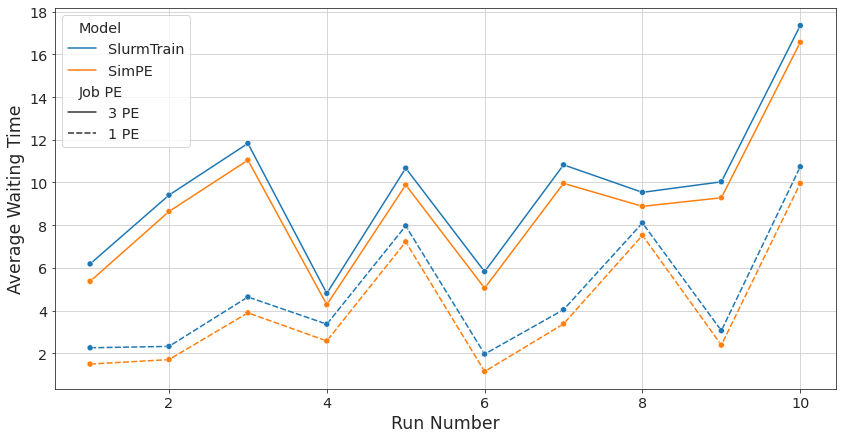

In [156]:
# Lets show this on one graph 

fig, ax =plt.subplots(figsize=(14,7))

sns.set_style("ticks", {'axes.grid' : True})

p1 = sns.scatterplot(data=df_plot, 
                     x = "RunNum",
                     y = "wait_time_mean",
                     hue= "Model",
                     ax = ax,
                     zorder = 10,
                     legend = None,
                     palette="tab10"
                     )

p2 = sns.lineplot(data=df_plot,
                  x = "RunNum",
                  y = "wait_time_mean",
                  hue = "Model",
                  style = "Job PE",
                  style_order = ('3 PE','1 PE'),
                  ci = None,
                  palette="tab10",
                  ax = ax)

plt.xlabel("Run Number")
plt.ylabel("Average Waiting Time")

myrun_models = "slurmtrain_simpe"
pltpath = f'{save_image_path}/{myrun_shortname}_{myrun_models}.png'

plt.savefig(pltpath, facecolor='w', transparent=False)

plt.show()

#### Jitter Wait Time Plot

In [157]:
# dic_sala_dfjobs[0]

In [158]:
# dic_st_petime[0]
# dic_st_sacct[0]

In [159]:
# [x-1000+1 for x in list(dic_st_sacct[0].JobName)]

In [160]:
dic_sala_dfjobs[0].loc[:, ['job_number', 'wait_time']]

,job_number,wait_time
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0
...,...,...
195,195,0.0
196,196,0.0
197,197,0.0
198,198,0.0


In [161]:
# dic_st_sacct[0]

In [162]:
j = 0
st_acct = dic_st_sacct[j].loc[:, ['JobName', 'wait_time']].copy()
st_acct['job_name'] = st_acct['JobName'].astype(int)
st_acct['RunType'] = 'slurmtrain'
st_acct['SchedType'] = 'FIFO'

sala_jobs = dic_sala_dfjobs[j].loc[:, ['job_name', 'wait_time']].copy()
sala_jobs['job_name'] = sala_jobs['job_name'].astype(int)
sala_jobs['RunType'] = 'salabim'
sala_jobs['SchedType'] = 'FIFO'

pd.merge(sala_jobs, st_acct, on="job_name", how="inner")

,job_name,wait_time_x,RunType_x,SchedType_x,JobName,wait_time_y,RunType_y,SchedType_y
0,1000,0.0,salabim,FIFO,1000,0.0,slurmtrain,FIFO
1,1001,0.0,salabim,FIFO,1001,0.0,slurmtrain,FIFO
2,1002,0.0,salabim,FIFO,1002,1.0,slurmtrain,FIFO
3,1003,0.0,salabim,FIFO,1003,1.0,slurmtrain,FIFO
4,1004,0.0,salabim,FIFO,1004,1.0,slurmtrain,FIFO
...,...,...,...,...,...,...,...,...
195,1195,0.0,salabim,FIFO,1195,0.0,slurmtrain,FIFO
196,1196,0.0,salabim,FIFO,1196,0.0,slurmtrain,FIFO
197,1197,0.0,salabim,FIFO,1197,1.0,slurmtrain,FIFO
198,1198,0.0,salabim,FIFO,1198,1.0,slurmtrain,FIFO


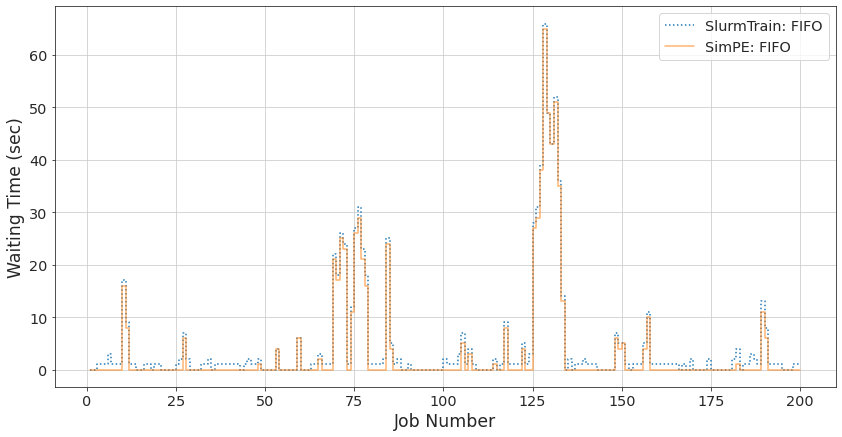

In [163]:
n = 200

fig, ax = plt.subplots(figsize=[14,7])
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# runs=range(0,10)
run = 1
j = run-1
st_acct = dic_st_sacct[j].loc[:, ['JobName', 'wait_time']].copy()
st_acct['job_name'] = st_acct['JobName'].astype(int)
st_acct['RunType'] = 'slurmtrain'
st_acct['SchedType'] = 'FIFO'

sala_jobs = dic_sala_dfjobs[j].loc[:, ['job_name', 'wait_time']].copy()
sala_jobs['job_name'] = sala_jobs['job_name'].astype(int)
sala_jobs['RunType'] = 'salabim'
sala_jobs['SchedType'] = 'FIFO'

compare_wait = pd.merge(left=sala_jobs, 
                        right=st_acct, 
                        how="inner",
                        on="job_name",
                        suffixes = ("_sala", "_st")
                        )

compare_wait['Job Number'] = compare_wait.job_name - 1000 + 1


# Plot
ax.step(compare_wait['Job Number'], 
    compare_wait.wait_time_st,
    linestyle='dotted',
    where='post',
    label = st_plot_label,
    alpha=1)

# Plot 
ax.step(compare_wait['Job Number'], 
    compare_wait.wait_time_sala,
    linestyle='solid',
    where='post',
    label = sala_plot_label,
    alpha=.6)
    
ax.legend()
ax.set_xlabel('Job Number')
# ax.set_ylabel(r'PE Available / Max PE')
ax.set_ylabel('Waiting Time (sec)')

myrun_models = f"{myrun_type}_wait_step_plot_run{run}"
pltpath = f'{save_image_path}/{myrun_shortname}_{myrun_models}.png'

plt.savefig(pltpath, facecolor='w', transparent=False, dpi=300)

plt.show()

In [164]:
# ?ax.step

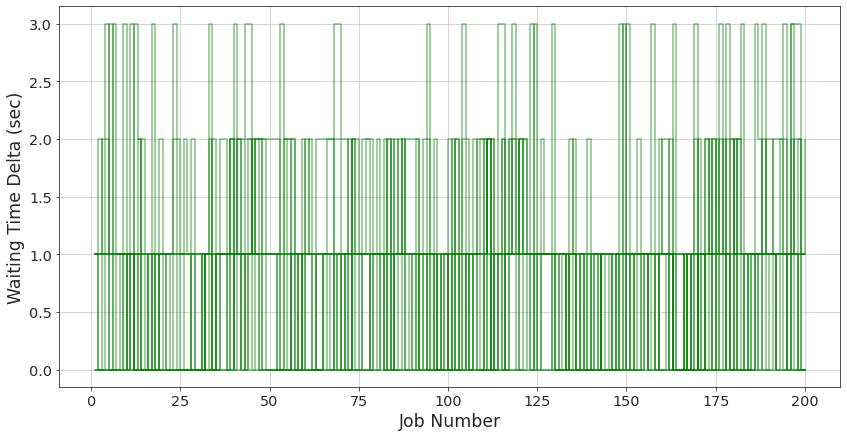

In [165]:
fig, ax = plt.subplots(figsize=[14,7])
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

runs=range(0,10)

for j in runs:
    st_acct = dic_st_sacct[j].loc[:, ['JobName', 'wait_time']].copy()
    st_acct['job_name'] = st_acct['JobName'].astype(int)
    st_acct['RunType'] = 'slurmtrain'
    st_acct['SchedType'] = 'FIFO'

    sala_jobs = dic_sala_dfjobs[j].loc[:, ['job_name', 'wait_time']].copy()
    sala_jobs['job_name'] = sala_jobs['job_name'].astype(int)
    sala_jobs['RunType'] = 'salabim'
    sala_jobs['SchedType'] = 'FIFO'

    compare_wait = pd.merge(left=sala_jobs, 
                            right=st_acct, 
                            how="inner",
                            on="job_name",
                            suffixes = ("_sala", "_st")
                            )
    
    compare_wait['Job Number'] = compare_wait.job_name - 1000 + 1

    
    # Plot
    ax.step(compare_wait['Job Number'], 
        compare_wait.wait_time_st - compare_wait.wait_time_sala,
        where='post',
        label = f"Jitter: SlurmTrain - SimPE",
        c='g',
        alpha=.5,
        )
    
# ax.legend()
ax.set_xlabel('Job Number')
# ax.set_ylabel(r'PE Available / Max PE')
ax.set_ylabel('Waiting Time Delta (sec)')

myrun_models = f"{myrun_type}_wait_jitter_plot"
pltpath = f'{save_image_path}/{myrun_shortname}_{myrun_models}.png'

plt.savefig(pltpath, facecolor='w', transparent=False, dpi=300)

plt.show()

### Jitter Wait Delta: histogram

In [166]:
dic_sala_dfjobs[j].columns

Index(['job_number', 'job_name', 'job_submit', 'batch_name', 'batch_value',
       'job_start', 'job_end', 'job_pe_req', 'pe_avail', 'job_prio',
       'slurm_comment', 'wait_time', 'run_time', 'backfill'],
      dtype='object')

In [167]:
runs=range(0,10)

list_compare_wait = []

for j in runs:
    st_acct = dic_st_sacct[j].loc[:, ['JobName', 'pe_req', 'wait_time']].copy()
    st_acct = st_acct.rename(columns={'pe_req':'job_pe_req'})
    st_acct['job_name'] = st_acct['JobName'].astype(int)
    st_acct['RunType'] = 'slurmtrain'
    st_acct['SchedType'] = 'FIFO'

    sala_jobs = dic_sala_dfjobs[j].loc[:, ['job_name', 'job_pe_req', 'wait_time']].copy()
    sala_jobs['job_name'] = sala_jobs['job_name'].astype(int)
    sala_jobs['RunType'] = 'salabim'
    sala_jobs['SchedType'] = 'FIFO'

    compare_wait = pd.merge(left=sala_jobs, 
                            right=st_acct, 
                            how="inner",
                            on=["job_name", "job_pe_req"],
                            suffixes = ("_sala", "_st")
                            )
    
    compare_wait['Job Number'] = compare_wait.job_name - 1000 + 1
    compare_wait['run_num'] = j+1
    
    compare_wait['delta_wait'] = compare_wait.wait_time_st - compare_wait.wait_time_sala
  
    list_compare_wait.append(compare_wait)

#     # Plot
#     ax.step(compare_wait['Job Number'], 
#         compare_wait.wait_time_st - compare_wait.wait_time_sala,
#         where='post',
#         label = f"Jitter: SlurmTrain - SimPE",
#         c='g',
#         alpha=.5,
#         )

compare_wait_all = (pd.concat(list_compare_wait)
                    .reset_index(drop=True)
                    .loc[:, ["run_num", "SchedType_st", "Job Number","job_name", 
                             "job_pe_req",
                             "wait_time_st", "wait_time_sala", "delta_wait"]]
                   )

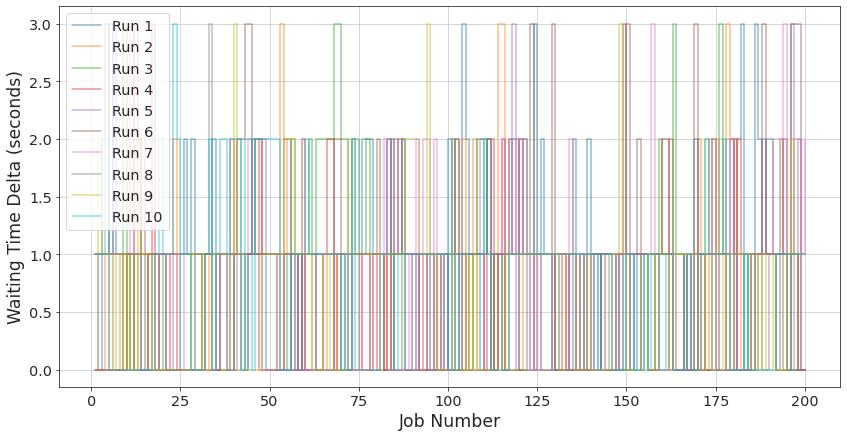

In [168]:
fig, ax = plt.subplots(figsize=[14,7])
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

runs=range(0,10)

compare_wait_all=compare_wait_all.set_index('run_num')

for run in compare_wait_all.index.unique():
    # Plot
    
    ax.step(compare_wait_all.loc[run]['Job Number'], 
        compare_wait_all.loc[run].delta_wait,
        where='post',
        label = f"Run {run}",
#         c='g',
        alpha=.5,
        )

compare_wait_all=compare_wait_all.reset_index()
    
ax.legend()
ax.set_xlabel('Job Number')
# ax.set_ylabel(r'PE Available / Max PE')
ax.set_ylabel('Waiting Time Delta (seconds)')

myrun_models = f"{myrun_type}_wait_jitter_plot_colour"
pltpath = f'{save_image_path}/debug/{myrun_shortname}_{myrun_models}.png'

# plt.savefig(pltpath, facecolor='w', transparent=False)

plt.show()

### Tables

#### Wait Table All

In [169]:
wait_table_all = (compare_wait_all
#  .query("run_num == 1")
 .loc[:, ['run_num', 'job_name', 'wait_time_sala', 'wait_time_st', 'delta_wait']]
 .groupby('run_num')
 .agg({'job_name' : ['count'],
       'wait_time_sala' : ['mean'],
       'wait_time_st' : ['mean']})
 .reset_index(drop=False)
)

wait_table_all["ratio"] = wait_table_all.wait_time_sala / wait_table_all.wait_time_st

wait_table_all["delta"] = wait_table_all.wait_time_st - wait_table_all.wait_time_sala

# wait_table_all.columns = wait_table_all.columns.droplevel(1)

# wait_table_all = wait_table_all.rename(columns={'run_num':'Run Number'})

# wait_table_all.set_index('Run Number', inplace=True)

# mycolumns = [('', 'Run Number'),
#              ('', 'Job Count'), 
#              ('Waiting Time', 'SlurmTrain'),
#              ('Waiting Time', 'SimPE'),
#              ('Waiting Time', 'Delta')]

# wait_table_all.columns = pd.MultiIndex.from_tuples(mycolumns)

wait_table_all

,run_num,job_name,wait_time_sala,wait_time_st,ratio,delta
,,count,mean,mean,,
0,1,200,3.390,4.180,0.811005,0.790
1,2,200,5.275,5.970,0.883585,0.695
2,3,200,7.720,8.485,0.909841,0.765
3,4,200,3.355,4.025,0.833540,0.670
4,5,200,8.725,9.495,0.918905,0.770
5,6,200,3.135,3.930,0.797710,0.795
6,7,200,6.600,7.365,0.896130,0.765
7,8,200,8.155,8.770,0.929875,0.615
8,9,200,5.660,6.370,0.888540,0.710


In [170]:
table_name = f"{myrun_type}_wait_table_all.tex"
table_path = Path(f'{save_image_path}/tables/{table_name}')

print(f"LATEX OUTPUT: {table_path}")
print(f"LATEX INCLUDE: {table_name}")
# print(f"LATEX INCLUDE: \input{{{str(table_path.relative_to('images'))}}}")
print("")

latex_table = (wait_table_all
    .loc[:, ["run_num", "wait_time_sala", "wait_time_st", "ratio"
            # , "delta"
            ]]
    .droplevel(1, axis=1)
    .to_latex(index = False,
            column_format = 'ccccc',
            header=["Run Number", 
                    r"$\overline{W}^{(fifo)}_{PE}$",
                    r"$\overline{W}^{(fifo)}_{ST}$",
                    r"$\overline{W}^{(fifo)}_{PE} / \overline{W}^{(fifo)}_{ST}$" #,
              #      r"$\overline{W}_{ST} - \overline{W}_{PE}$"
                   ],
            float_format="%.2f",
            escape = False)
)

# # Modifications to the latex table code:

# latex_list = latex_table.splitlines()

# new_header_list = [
# r"\begin{tabular}{lrrrr}",
# r"\toprule",
# r"& & \multicolumn{3}{c}{Average Waiting Time (sec)} \\ \cline{3-5}" ,
# r"Run Number & Count & SlurmTrain & SimPE & Delta \\",
# r"\midrule"
# ]

# latex_new_list = new_header_list + latex_list[2:]

# # # latex_list.insert(3, r'\cmidrule(lr){3-5} \\')

# # # for i,line in enumerate(latex_list): 
# # #     if line.find(r"\begin{table}") >= 0: 
# # #         latex_list[i] = r"\begin{table}[!ht]"

# latex_new_table = "\n".join(latex_new_list)
    
# print(latex_new_table)

print(latex_table)

# # Write Output
with open(table_path, 'w') as f:
    f.write(latex_table)

LATEX OUTPUT: images/results/tables/fiforun_wait_table_all.tex
LATEX INCLUDE: fiforun_wait_table_all.tex

\begin{tabular}{ccccc}
\toprule
Run Number & $\overline{W}^{(fifo)}_{PE}$ & $\overline{W}^{(fifo)}_{ST}$ & $\overline{W}^{(fifo)}_{PE} / \overline{W}^{(fifo)}_{ST}$ \\
\midrule
         1 &                         3.39 &                         4.18 &                                               0.81 \\
         2 &                         5.28 &                         5.97 &                                               0.88 \\
         3 &                         7.72 &                         8.48 &                                               0.91 \\
         4 &                         3.35 &                         4.03 &                                               0.83 \\
         5 &                         8.72 &                         9.49 &                                               0.92 \\
         6 &                         3.13 &                         3.93

#### Wait Table Metrics

In [171]:
# Waiting time all jobs - metric table

wait_table_all_metrics = wait_table_all.copy()

wait_table_all_metrics.columns = wait_table_all_metrics.columns.droplevel(1)

wait_table_all_metrics = (wait_table_all_metrics
                          .drop(columns=['run_num', 'job_name', 'delta'])
                          .agg(metrics)
                          .reset_index()
                          .rename(columns={'index':'metric'})
                          .assign(metric_name = metric_names)
                         )

wait_table_all_metrics

# wait_table_all.columns

,metric,wait_time_sala,wait_time_st,ratio,metric_name
0,min,3.135000,3.930000,0.797710,min
1,max,13.430000,14.210000,0.945109,max
2,std,3.167293,3.172489,0.050714,$s_{dev}$
3,mean,6.544500,7.280000,0.881424,average


In [172]:
table_name = f"{myrun_type}_wait_table_all_metrics.tex"
table_path = Path(f'{save_image_path}/tables/{table_name}')

print(f"LATEX OUTPUT: {table_path}")
print(f"LATEX INCLUDE: {table_name}")
# print(f"LATEX INCLUDE: \input{{{str(table_path.relative_to('images'))}}}")
print("")

latex_table = (wait_table_all_metrics
    .loc[:, ["metric_name", "wait_time_sala", "wait_time_st", "ratio"
            # , "delta"
            ]]
    .to_latex(index = False,
            column_format = 'lcccc',
            header=["Metric", 
                    r"$\overline{W}^{(fifo)}_{PE}$",
                    r"$\overline{W}^{(fifo)}_{ST}$",
                    r"$\overline{W}^{(fifo)}_{PE} / \overline{W}^{(fifo)}_{ST}$" #,
              #      r"$\overline{W}_{ST} - \overline{W}_{PE}$"
                   ],
            float_format="%.2f",
            escape = False)
)

# # Modifications to the latex table code:

# latex_list = latex_table.splitlines()

# new_header_list = [
# r"\begin{tabular}{lrrrr}",
# r"\toprule",
# r"& & \multicolumn{3}{c}{Average Waiting Time (sec)} \\ \cline{3-5}" ,
# r"Run Number & Count & SlurmTrain & SimPE & Delta \\",
# r"\midrule"
# ]

# latex_new_list = new_header_list + latex_list[2:]

# # # latex_list.insert(3, r'\cmidrule(lr){3-5} \\')

# # # for i,line in enumerate(latex_list): 
# # #     if line.find(r"\begin{table}") >= 0: 
# # #         latex_list[i] = r"\begin{table}[!ht]"

# latex_new_table = "\n".join(latex_new_list)
    
# print(latex_new_table)

print(latex_table)

# # Write Output
with open(table_path, 'w') as f:
    f.write(latex_table)

LATEX OUTPUT: images/results/tables/fiforun_wait_table_all_metrics.tex
LATEX INCLUDE: fiforun_wait_table_all_metrics.tex

\begin{tabular}{lcccc}
\toprule
    Metric & $\overline{W}^{(fifo)}_{PE}$ & $\overline{W}^{(fifo)}_{ST}$ & $\overline{W}^{(fifo)}_{PE} / \overline{W}^{(fifo)}_{ST}$ \\
\midrule
       min &                         3.13 &                         3.93 &                                               0.80 \\
       max &                        13.43 &                        14.21 &                                               0.95 \\
 $s_{dev}$ &                         3.17 &                         3.17 &                                               0.05 \\
   average &                         6.54 &                         7.28 &                                               0.88 \\
\bottomrule
\end{tabular}



#### Wait Table per Job Type

In [173]:
# Waiting Time per job type

wait_table_jobtype_all = (compare_wait_all
#  .query("run_num == 1")
 .loc[:, ['run_num', 'job_pe_req', 'job_name', 'wait_time_st', 'wait_time_sala', 'delta_wait']]
 .assign(str_job_pe_req = lambda x: x.job_pe_req.astype(str))
 .groupby(['run_num','str_job_pe_req'])
 .agg({'job_name' : ['count'],
       'wait_time_st' : ['mean'],
       'wait_time_sala' : ['mean']})
 .reset_index(drop=False)
)

wait_table_jobtype_all["ratio"] = wait_table_jobtype_all.wait_time_sala / wait_table_jobtype_all.wait_time_st

wait_table_jobtype_all["delta"] = wait_table_jobtype_all.wait_time_st - wait_table_jobtype_all.wait_time_sala

wait_table_jobtype_all.columns = wait_table_jobtype_all.columns.droplevel(1)
wait_table_jobtype_all.rename(columns={'job_name':'job_count',
                                       'str_job_pe_req' : 'job_pe_req'}, inplace=True)

wait_table_jobtype_all["job_type"] = wait_table_jobtype_all.job_pe_req + " PE"

wait_table_jobtype_all.head()

,run_num,job_pe_req,job_count,wait_time_st,wait_time_sala,ratio,delta,job_type
0,1,1,102,2.254902,1.490196,0.660870,0.764706,1 PE
1,1,3,98,6.183673,5.367347,0.867987,0.816327,3 PE
2,2,1,97,2.319588,1.701031,0.733333,0.618557,1 PE
3,2,3,103,9.407767,8.640777,0.918473,0.766990,3 PE
4,3,1,93,4.634409,3.892473,0.839907,0.741935,1 PE


In [174]:
batch_count = wait_table_jobtype_all.run_num.max()

wait_table_jobtype_table = (wait_table_jobtype_all
                            .groupby(["job_pe_req", "job_type"])
                            .agg({'job_count' : ['sum'],
                                  'wait_time_sala' :['mean'],
                                  'wait_time_st' :['mean']})
                            .sort_index(ascending=[True])
                            .droplevel(1,axis=1)
                            .reset_index(drop=False)
                            .assign(ratio = lambda x: x.wait_time_sala / x.wait_time_st)
                            .assign(delta = lambda x: x.wait_time_st - x.wait_time_sala)
                            .assign(jobs_per_batch = lambda x: x.job_count / batch_count)
)

wait_table_jobtype_table

,job_pe_req,job_type,job_count,wait_time_sala,wait_time_st,ratio,delta,jobs_per_batch
0,1,1 PE,994,4.125378,4.843071,0.851810,0.717693,99.4
1,3,3 PE,1006,8.895711,9.647178,0.922105,0.751467,100.6


In [175]:
table_name = f"{myrun_type}_wait_table_jobtypes.tex"
table_path = Path(f'{save_image_path}/tables/{table_name}')

print(f"LATEX OUTPUT: {table_path}")
print(f"LATEX INCLUDE: {table_name}")
print("")

latex_table = (wait_table_jobtype_table
               .loc[:, ['job_type', 'jobs_per_batch', 'wait_time_sala', 'wait_time_st', 'ratio']]
               .to_latex(
    index=False,
    column_format='cccccc',
    header=["Job Type", 
            "Average Jobs Per Batch",
            r"$\mu_{\overline{W}^{(fifo)}_{PE}}$",
            r"$\mu_{\overline{W}^{(fifo)}_{ST}}$",
            r"$\mu_{\overline{W}^{(fifo)}_{PE}} / \mu_{\overline{W}^{(fifo)}_{ST}}$" #,
#            r"$\mu_{\overline{W}_{ST}} - \mu_{\overline{W}_{PE}}$"
           ],
    float_format="%.2f",
    escape = False) 
)
    
print(latex_table)
    
# # # Write Output
with open(table_path, 'w') as f:
    f.write(latex_table)

LATEX OUTPUT: images/results/tables/fiforun_wait_table_jobtypes.tex
LATEX INCLUDE: fiforun_wait_table_jobtypes.tex

\begin{tabular}{cccccc}
\toprule
Job Type & Average Jobs Per Batch & $\mu_{\overline{W}^{(fifo)}_{PE}}$ & $\mu_{\overline{W}^{(fifo)}_{ST}}$ & $\mu_{\overline{W}^{(fifo)}_{PE}} / \mu_{\overline{W}^{(fifo)}_{ST}}$ \\
\midrule
    1 PE &                  99.40 &                               4.13 &                               4.84 &                                               0.85 \\
    3 PE &                 100.60 &                               8.90 &                               9.65 &                                               0.92 \\
\bottomrule
\end{tabular}



### OLD Wait time tables 

In [176]:
# wait_table_all = (compare_wait_all
# #  .query("run_num == 1")
#  .loc[:, ['run_num', 'job_name', 'wait_time_sala', 'wait_time_st', 'delta_wait']]
#  .groupby('run_num')
#  .agg({'job_name' : ['count'],
#        'wait_time_sala' : ['mean'],
#        'wait_time_st' : ['mean']})
#  .reset_index(drop=False)
# )

# wait_table_all["delta"] = wait_table_all.wait_time_st - wait_table_all.wait_time_sala

# # wait_table_all["ratio"] = wait_table_all.wait_time_sala / wait_table_all.wait_time_sala

# # wait_table_all.columns = wait_table_all.columns.droplevel(1)

# # wait_table_all = wait_table_all.rename(columns={'run_num':'Run Number'})

# # wait_table_all.set_index('Run Number', inplace=True)

# # mycolumns = [('', 'Run Number'),
# #              ('', 'Job Count'), 
# #              ('Waiting Time', 'SlurmTrain'),
# #              ('Waiting Time', 'SimPE'),
# #              ('Waiting Time', 'Delta')]

# # wait_table_all.columns = pd.MultiIndex.from_tuples(mycolumns)

# wait_table_all

In [177]:
# table_name = f"{myrun_type}_wait_table_all.tex"
# table_path = Path(f'{save_image_path}/tables/{table_name}')

# print(f"LATEX OUTPUT: {table_path}")
# print(f"LATEX INCLUDE: {table_name}")
# # print(f"LATEX INCLUDE: \input{{{str(table_path.relative_to('images'))}}}")
# print("")

# latex_table = wait_table_all.to_latex(column_format='lrrrr',
# #                                       multirow=True,
#                                       header=False,
#                                       index=False
# #                                       multicolumn_format='c'
#                                       # caption="FIFO Results Table",
#                                       # label=table_name
#                                      )

# # Modifications to the latex table code:

# latex_list = latex_table.splitlines()

# new_header_list = [
# r"\begin{tabular}{lrrrr}",
# r"\toprule",
# r"& & \multicolumn{3}{c}{Average Waiting Time (sec)} \\ \cline{3-5}" ,
# r"Run Number & Count & SlurmTrain & SimPE & Delta \\",
# r"\midrule"
# ]

# latex_new_list = new_header_list + latex_list[2:]

# # # latex_list.insert(3, r'\cmidrule(lr){3-5} \\')

# # # for i,line in enumerate(latex_list): 
# # #     if line.find(r"\begin{table}") >= 0: 
# # #         latex_list[i] = r"\begin{table}[!ht]"

# latex_new_table = "\n".join(latex_new_list)
    
# print(latex_new_table)
    
# # # Write Output
# with open(table_path, 'w') as f:
#     f.write(latex_new_table)

In [178]:
# # Waiting Time per job 

# wait_table_jobtype_all = (compare_wait_all
# #  .query("run_num == 1")
#  .loc[:, ['run_num', 'job_pe_req', 'job_name', 'wait_time_st', 'wait_time_sala', 'delta_wait']]
#  .assign(str_job_pe_req = lambda x: x.job_pe_req.astype(str))
#  .groupby(['run_num','str_job_pe_req'])
#  .agg({'job_name' : ['count'],
#        'wait_time_st' : ['mean'],
#        'wait_time_sala' : ['mean']})
#  .reset_index(drop=False)
# )

# wait_table_jobtype_all["delta"] = wait_table_jobtype_all.wait_time_st - wait_table_jobtype_all.wait_time_sala

# wait_table_jobtype_all.columns = wait_table_jobtype_all.columns.droplevel(1)
# wait_table_jobtype_all.rename(columns={'job_name':'job_count',
#                                        'str_job_pe_req' : 'job_pe_req'}, inplace=True)

# wait_table_jobtype_all["job_type"] = wait_table_jobtype_all.job_pe_req + " PE"

# wait_table_jobtype_all

In [179]:
# wait_table_jobtype_table = (wait_table_jobtype_all
#                             .groupby('job_type')
#                             .agg({'run_num' : ['nunique'],
#                                   'job_count' : ['sum'],
#                                   'wait_time_st' :['mean'],
#                                   'wait_time_sala' :['mean'],
#                                   'delta': ['mean', 'std']})
#                            )

# # Combined

# wait_all_jobs_row = (wait_table_jobtype_all
#                      .assign(job_type = 'ALL')
#                      .groupby('job_type')
#                      .agg({'run_num' : ['nunique'],
#                            'job_count' : ['sum'],
#                            'wait_time_st' :['mean'],
#                            'wait_time_sala' :['mean'],
#                            'delta': ['mean', 'std']})
#                )

# wait_table_jobtype_table = pd.concat([wait_table_jobtype_table, wait_all_jobs_row], axis=0)

# wait_table_jobtype_table.reset_index(drop=False, inplace=True)

# # Job count sum -> Job count per batch
# batch_count = np.median(wait_table_jobtype_table['run_num']['nunique'])
# wait_table_jobtype_table.loc[:, ('job_count','sum')] = wait_table_jobtype_table.loc[:, ('job_count','sum')] / batch_count

# # Drop Job Batch count column
# wait_table_jobtype_table.drop(columns=['run_num'], level=0, inplace=True)

# # Show Table
# wait_table_jobtype_table

In [180]:
# # Rounding
# wait_table_jobtype_table.wait_time_st = wait_table_jobtype_table.wait_time_st.round(2)
# wait_table_jobtype_table.wait_time_sala = wait_table_jobtype_table.wait_time_sala.round(2)
# wait_table_jobtype_table.delta = wait_table_jobtype_table.delta.round(2)

# wait_table_jobtype_table

In [181]:
# table_name = f"{myrun_type}_wait_table_jobtypes.tex"
# table_path = Path(f'{save_image_path}/tables/{table_name}')

# print(f"LATEX OUTPUT: {table_path}")
# print(f"LATEX INCLUDE: {table_name}")
# print("")

# latex_table = (wait_table_jobtype_table
#                .droplevel(1, axis=1)
#                .to_latex(
#     index=False,
#     escape=False,
#     column_format='lcccccc',
#     header=["Job Type", 
#             "Average Jobs Per Batch",
#             r"$\mu_{\overline{W}_{ST}}$",
#             r"$\mu_{\overline{W}_{PE}}$",
#             r"$\mu_{\overline{\Delta W_j}}$",
#             r"$\sigma_{\overline{\Delta W_j}}$"])
# )
    
# print(latex_table)
    
# # # Write Output
# with open(table_path, 'w') as f:
#     f.write(latex_table)

In [182]:
# EVEN OLDER VERSION 

# table_name = f"{myrun_type}_wait_table_jobtypes.tex"
# table_path = Path(f'{save_image_path}/tables/{table_name}')

# print(f"LATEX OUTPUT: {table_path}")
# print(f"LATEX INCLUDE: {table_name}")
# # print(f"LATEX INCLUDE: \input{{{str(table_path.relative_to('images'))}}}")
# print("")

# latex_table = wait_table_jobtype_table.to_latex(column_format='lrrrrrr',
# #                                       multirow=True,
#                                       header=False,
#                                       index=False
# #                                       multicolumn_format='c'
#                                       # caption="FIFO Results Table",
#                                       # label=table_name
#                                      )

# # Modifications to the latex table code:

# latex_list = latex_table.splitlines()

# new_header_list = [    
# r"\begin{tabular}{@{}lccccc@{}}",
# r"\toprule",
# r" &  & \multicolumn{2}{c}{\begin{tabular}[c]{@{}c@{}}Mean \\ Waiting Times\end{tabular}} & \multicolumn{2}{c}{\begin{tabular}[c]{@{}c@{}}Delta \\ Waiting Times \\ (ST - SP)\end{tabular}} \\ \cmidrule(l){3-6} ",
# r"Job Type (PE) & \begin{tabular}[c]{@{}c@{}}Average \\ Jobs Per Batch\end{tabular} & SlurmTrain (ST) & SimPE (SP) & Mean & Std Dev \\ \midrule"
# ]

# latex_new_list = new_header_list + latex_list[2:]

# # # latex_list.insert(3, r'\cmidrule(lr){3-5} \\')

# # # for i,line in enumerate(latex_list): 
# # #     if line.find(r"\begin{table}") >= 0: 
# # #         latex_list[i] = r"\begin{table}[!ht]"

# latex_new_table = "\n".join(latex_new_list)
    
# print(latex_new_table)
    
# # # Write Output
# with open(table_path, 'w') as f:
#     f.write(latex_new_table)

### Histograms

In [183]:
wait_table_jobtype_all.sort_values('job_type')

,run_num,job_pe_req,job_count,wait_time_st,wait_time_sala,ratio,delta,job_type
0,1,1,102,2.254902,1.490196,0.660870,0.764706,1 PE
2,2,1,97,2.319588,1.701031,0.733333,0.618557,1 PE
16,9,1,105,3.057143,2.380952,0.778816,0.676190,1 PE
4,3,1,93,4.634409,3.892473,0.839907,0.741935,1 PE
6,4,1,108,3.361111,2.574074,0.765840,0.787037,1 PE
14,8,1,107,8.102804,7.523364,0.928489,0.579439,1 PE
8,5,1,87,7.965517,7.218391,0.906205,0.747126,1 PE
18,10,1,95,10.736842,9.957895,0.927451,0.778947,1 PE
10,6,1,98,1.959184,1.142857,0.583333,0.816327,1 PE
12,7,1,102,4.039216,3.372549,0.834951,0.666667,1 PE


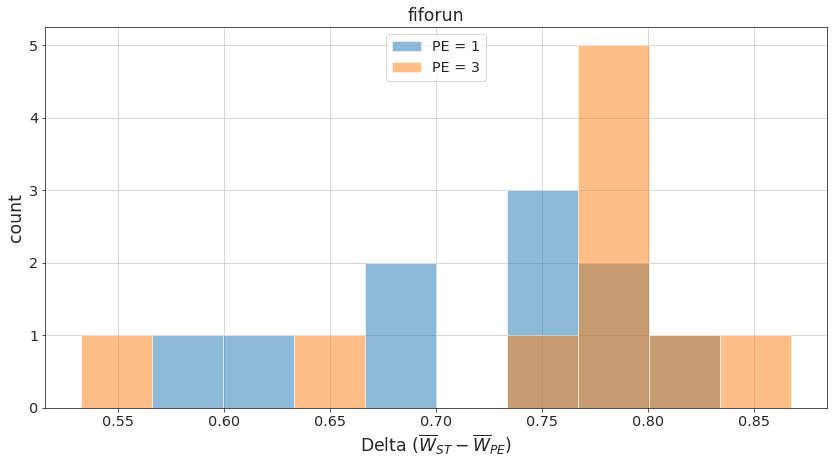

In [184]:
# # RECORD OF DIFFERENT WAYS TO PLOT HISTOGRAM

wait_table_jt_plot = (wait_table_jobtype_all
#                       .loc[wait_table_jobtype_all.job_type!='3 PE',:]
                      .copy()
                     )

pe_list = wait_table_jt_plot.job_pe_req.unique().tolist()

x = wait_table_jt_plot.delta.values
counts, bins = np.histogram(x)

fig, ax = plt.subplots(figsize=(14,7))

for pe in pe_list:
    x = wait_table_jt_plot.loc[wait_table_jt_plot.job_pe_req==pe,:].delta.values

    plt.hist(x, bins, alpha=0.5, label=f'PE = {pe}')

plt.xlabel('Delta ($\overline{W}_{ST} - \overline{W}_{PE})$')
plt.ylabel('count')
plt.legend(loc='upper center')

plt.title(f"{myrun_type}")

myrun_models = f"{myrun_type}_histo_jobtype_delta"
pltpath = f'{save_image_path}/debug/{myrun_type}_{myrun_models}.png'

plt.savefig(pltpath, facecolor='w', transparent=False)

plt.show()

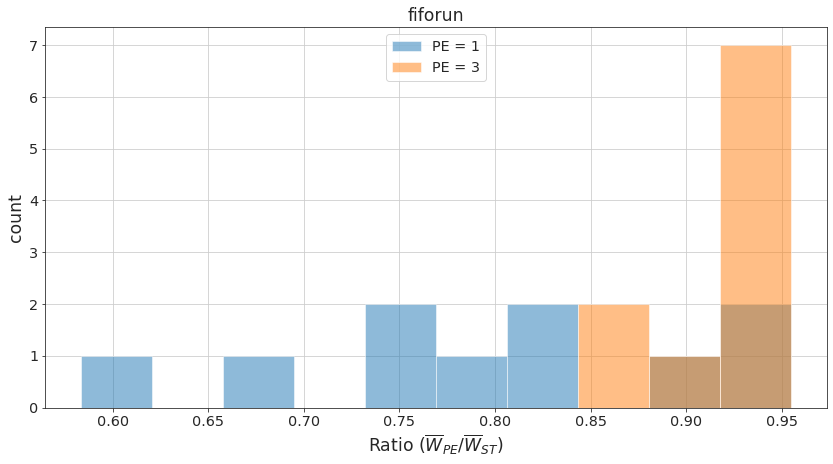

In [185]:
# # RECORD OF DIFFERENT WAYS TO PLOT HISTOGRAM

wait_table_jt_plot = (wait_table_jobtype_all
#                       .loc[wait_table_jobtype_all.job_type!='3 PE',:]
                      .copy()
                     )

pe_list = wait_table_jt_plot.job_pe_req.unique().tolist()

x = wait_table_jt_plot.ratio.values
counts, bins = np.histogram(x)

fig, ax = plt.subplots(figsize=(14,7))

for pe in pe_list:
    x = wait_table_jt_plot.loc[wait_table_jt_plot.job_pe_req==pe,:].ratio.values

    max_value = wait_table_jt_plot.ratio.max()

    plt.hist(x, bins, alpha=0.5, label=f'PE = {pe}')

plt.xlabel('Ratio ($\overline{W}_{PE} / \overline{W}_{ST}$)')
plt.ylabel('count')
plt.legend(loc='upper center')

plt.title(f"{myrun_type}")

myrun_models = f"{myrun_type}_histo_jobtype_ratio"
pltpath = f'{save_image_path}/debug/{myrun_type}_{myrun_models}.png'

plt.savefig(pltpath, facecolor='w', transparent=False)

plt.show()

In [186]:
# # RECORD OF DIFFERENT WAYS TO PLOT HISTOGRAM

# j = 0
# x = list_compare_wait[j].delta_wait
    
# # sns.histplot(list_compare_wait[j].delta_wait)
# # plt.hist(x, density=True)

# counts, bins = np.histogram(x)
# plt.bar(bins[:-1], counts, width=(bins[1]-bins[0]))
# hist(x, bins='knuth', density=True)

# # n, bins, patches = hist(x, bins="knuth", density=True) # For continues x
# # showbins = np.round(bins, 1)

# # n, bins, patches = hist(x, density=True) # For discrete x
# # showbins = bins.astype(int)

# # # centre labels
# # n_bins =len(bins)-1
# # ticks = [(patch._x0 + patch._x1)/2 for patch in patches]
# # ticklabels = [showbins[i] for i in range(n_bins)]
# # plt.xticks(ticks, ticklabels)

# plt.title(f"Run {j+1}")
# plt.show()

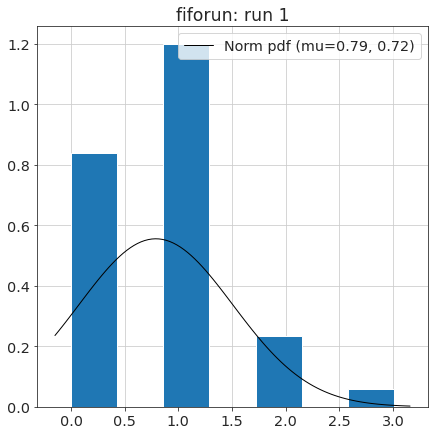

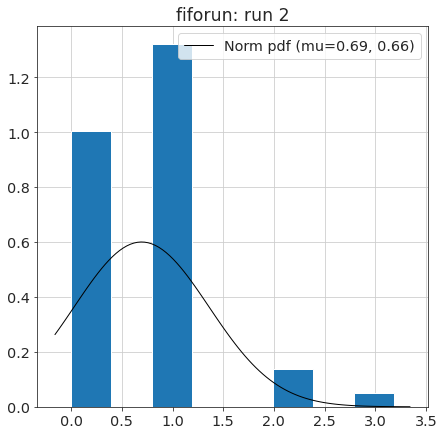

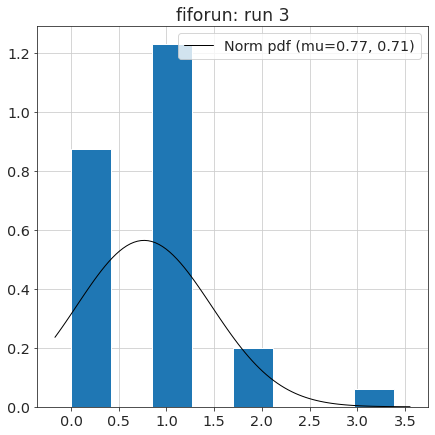

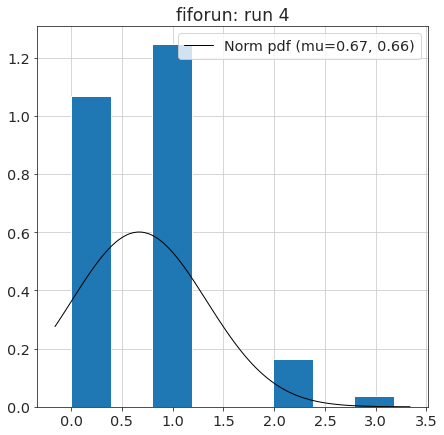

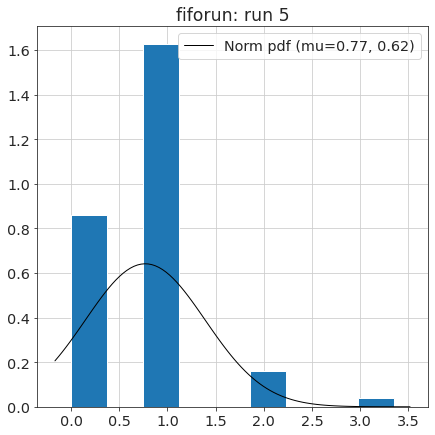

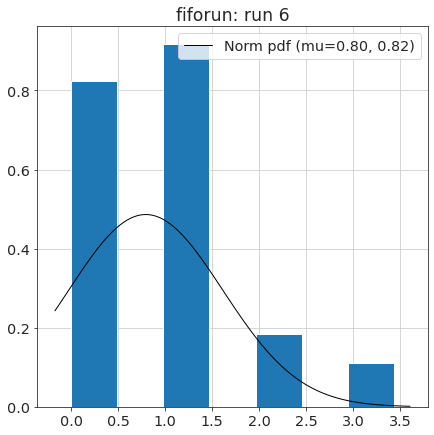

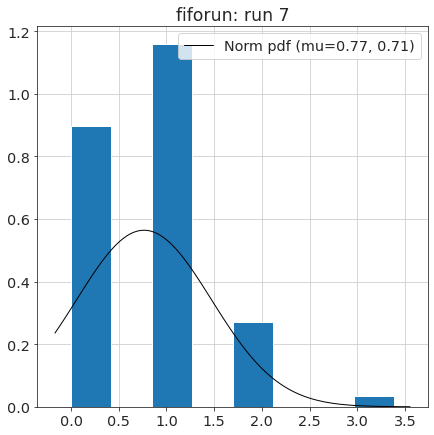

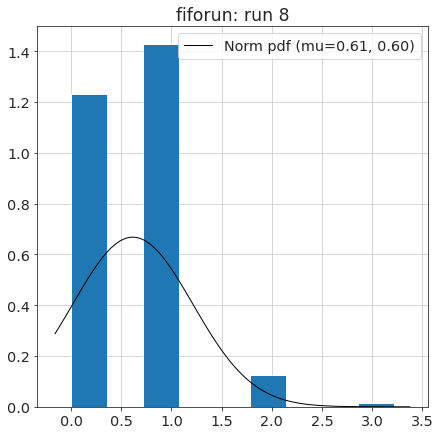

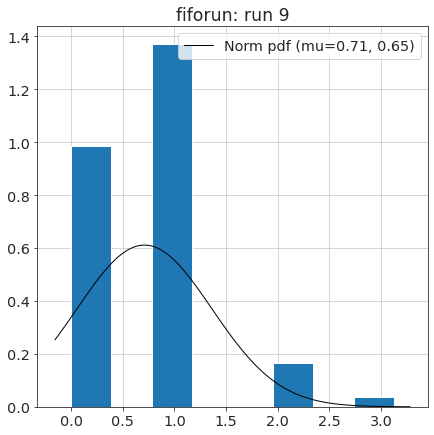

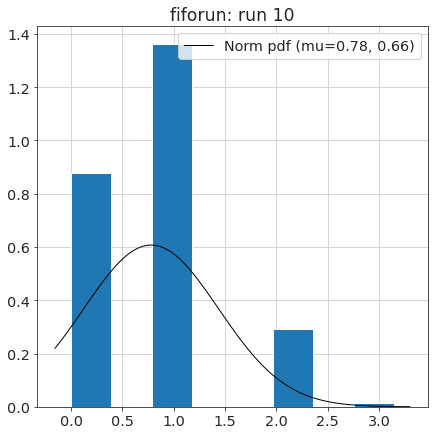

In [187]:
from astropy.visualization import hist
from scipy.stats import norm, t

# Plot histogram
for j in range(10):

    fig, ax = plt.subplots(figsize=[7,7])
    
    x = list_compare_wait[j].delta_wait
    
    # sns.histplot(list_compare_wait[j].delta_wait, stat = 'density')
    n, bins, patches = hist(x, bins='scott', density=True)
#     n, bins, patches = hist(x, bins='freedman', density=True)
#     hist(x, bins="knuth", density=True)
    
    mu, std = norm.fit(x) 

    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x_axis = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x_axis, mu, std)

    plt.plot(x_axis, p, 'k', linewidth=1, label=f"Norm pdf (mu={mu:.2f}, {std:.2f})")
    
    ax.legend()
    
    plt.title(f"{myrun_type}: run {j+1}")
    
    myrun_models = f"{myrun_type}_run{j+1}_wait_jitter_distrib"
    pltpath = f'{save_image_path}/debug/{myrun_shortname}_{myrun_models}.png'

    plt.savefig(pltpath, facecolor='w', transparent=False)
    
    plt.show()

In [188]:
# # Plot normalised histogram
# for j in range(10):
#     x = list_compare_wait[j].delta_wait
#     mu_x = np.mean(x)
#     sd_x = np.nanstd(x)
#     x_norm = (x - mu_x) / sd_x
    
# #     sns.histplot(list_compare_wait[j].delta_wait, stat = 'density')
#     n, bins, patches = hist(x_norm, bins='scott')
    
#     plt.title(f"Run {j+1}. Normalised with mu: {mu_x:.2f}, sd: {sd_x: .2f} ")
#     plt.show()

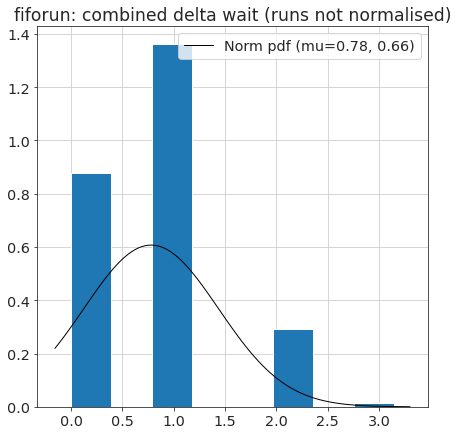

In [189]:
from scipy.stats import norm

# Plot normalised histogram
combined_x = []
for j in range(10):
    x = list_compare_wait[j].delta_wait
    mu_x = np.mean(x)
    sd_x = np.nanstd(x)
    x_norm = (x - mu_x) / sd_x
    combined_x = x
    
# Plot
fig, ax = plt.subplots(figsize=[7,7])
n, bins, patches = hist(combined_x, bins='scott', density=True, ax = ax)

# Fit a normal distribution to
# the data:
# mean and standard deviation
mu, std = norm.fit(combined_x) 

# Plot the PDF.
xmin, xmax = plt.xlim()
x_axis = np.linspace(xmin, xmax, 100)
p = norm.pdf(x_axis, mu, std)

plt.plot(x_axis, p, 'k', linewidth=1, label=f"Norm pdf (mu={mu:.2f}, {std:.2f})")

ax.legend()

plt.title(f"{myrun_type}: combined delta wait (runs not normalised)")

myrun_models = f"{myrun_type}_run{j+1}_combined_non_norm"
pltpath = f'{save_image_path}/debug/{myrun_shortname}_{myrun_models}.png'

plt.savefig(pltpath, facecolor='w', transparent=False)

plt.show()

This looks quite good ... but I am concerned that the big variance is due to big mismatches between the models. 
Well... I mean we can look at these mismatches ... to see how well they modelled stuff... 
in all likelihood it is just the the effect that stuff can go very wrong. i don't know. 
i don't have to know. it is okay. lets look at the bfsim model too. that's not my model.

In [190]:
print(f"mean : {np.mean(combined_x):.2f}")
print(f"std: {np.std(combined_x):.2f}")
print(f"median : {np.median(combined_x):.2f}")

mean : 0.78
std: 0.66
median : 1.00


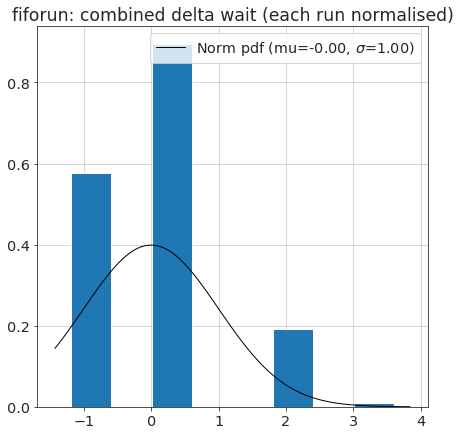

In [191]:
from scipy.stats import norm, t

# Plot normalised histogram
combined_x_norm = []
for j in range(10):
    x = list_compare_wait[j].delta_wait
    mu_x = np.mean(x)
    sd_x = np.nanstd(x)
    x_norm = (x - mu_x) / sd_x
    combined_x_norm = x_norm
    
# Plot
fig, ax = plt.subplots(figsize=[7,7])
n, bins, patches = hist(combined_x_norm, bins='scott', density=True, ax = ax)

# Fit a normal distribution to
# the data:
# mean and standard deviation
mu, std = norm.fit(combined_x_norm) 

# Plot the PDF.
xmin, xmax = plt.xlim()
x_axis = np.linspace(xmin, xmax, 100)
p = norm.pdf(x_axis, mu, std)
plt.plot(x_axis, p, 'k', linewidth=1, label=f"Norm pdf (mu={mu:.2f}, $\sigma$={std:.2f})")

# T distribution
# t_df, t_loc, t_scale = t.fit(combined_x_norm)
# p_t = t.pdf(x_axis, t_df, loc=t_loc, scale=t_scale)
# plt.plot(x_axis, p_t, 'b', linewidth=1, label=f"T pdf (df={t_df:.2f}, loc={t_loc:.2f}, scale={t_scale:.2f}")

ax.legend()

plt.title(f"{myrun_type}: combined delta wait (each run normalised)")

myrun_models = f"{myrun_type}_run{j+1}_combined_norm"
pltpath = f'{save_image_path}/debug/{myrun_shortname}_{myrun_models}.png'

plt.savefig(pltpath, facecolor='w', transparent=False)

plt.show()

In [192]:
print(f"mean : {np.mean(combined_x_norm)}")
print(f"std: {np.std(combined_x_norm)}")

mean : -7.993605777301127e-17
std: 0.9999999999999999


### OLD CODE: Jitter Wait Delta: histogram

In [193]:
runs=range(0,10)

list_compare_wait = []

for j in runs:
    st_acct = dic_st_sacct[j].loc[:, ['JobName', 'wait_time']].copy()
    st_acct['job_name'] = st_acct['JobName'].astype(int)
    st_acct['RunType'] = 'slurmtrain'
    st_acct['SchedType'] = 'FIFO'

    sala_jobs = dic_sala_dfjobs[j].loc[:, ['job_name', 'wait_time']].copy()
    sala_jobs['job_name'] = sala_jobs['job_name'].astype(int)
    sala_jobs['RunType'] = 'salabim'
    sala_jobs['SchedType'] = 'FIFO'

    compare_wait = pd.merge(left=sala_jobs, 
                            right=st_acct, 
                            how="inner",
                            on="job_name",
                            suffixes = ("_sala", "_st")
                            )
    
    compare_wait['Job Number'] = compare_wait.job_name - 1000 + 1
    compare_wait['run_num'] = j+1
    
    compare_wait['delta_wait'] = compare_wait.wait_time_st - compare_wait.wait_time_sala
  
    list_compare_wait.append(compare_wait)

#     # Plot
#     ax.step(compare_wait['Job Number'], 
#         compare_wait.wait_time_st - compare_wait.wait_time_sala,
#         where='post',
#         label = f"Jitter: SlurmTrain - SimPE",
#         c='g',
#         alpha=.5,
#         )

compare_wait_all = (pd.concat(list_compare_wait)
                    .reset_index(drop=True)
                    .loc[:, ["run_num", "SchedType_st", "Job Number","job_name", "wait_time_st", "wait_time_sala", "delta_wait"]]
                   )

In [194]:
# ?plt.hist

## Histogram

In [195]:
# # RECORD OF DIFFERENT WAYS TO PLOT HISTOGRAM

# j = 0
# x = list_compare_wait[j].delta_wait
    
# # sns.histplot(list_compare_wait[j].delta_wait)
# # plt.hist(x, density=True)

# counts, bins = np.histogram(x)
# plt.bar(bins[:-1], counts, width=(bins[1]-bins[0]))
# hist(x, bins='knuth', density=True)

# # n, bins, patches = hist(x, bins="knuth", density=True) # For continues x
# # showbins = np.round(bins, 1)

# # n, bins, patches = hist(x, density=True) # For discrete x
# # showbins = bins.astype(int)

# # # centre labels
# # n_bins =len(bins)-1
# # ticks = [(patch._x0 + patch._x1)/2 for patch in patches]
# # ticklabels = [showbins[i] for i in range(n_bins)]
# # plt.xticks(ticks, ticklabels)

# plt.title(f"Run {j+1}")
# plt.show()

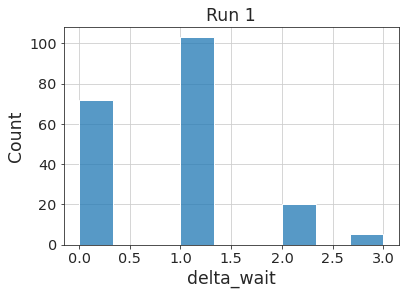

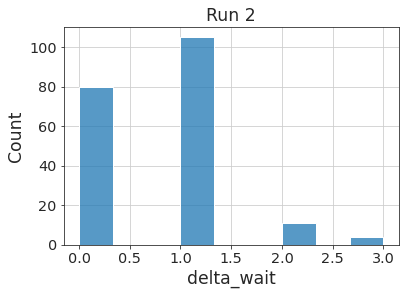

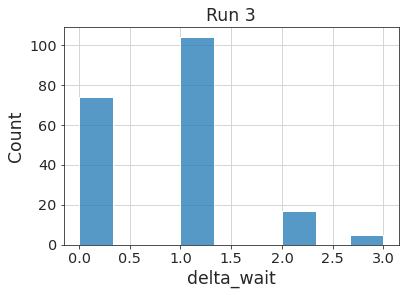

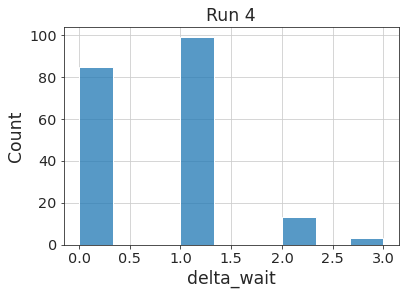

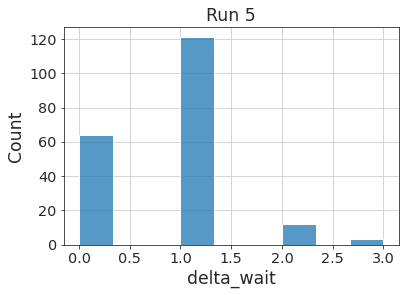

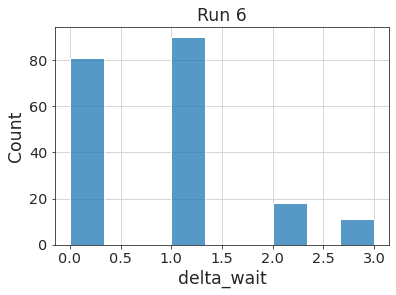

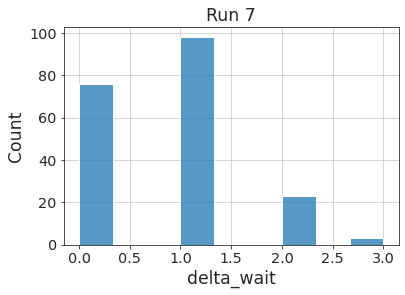

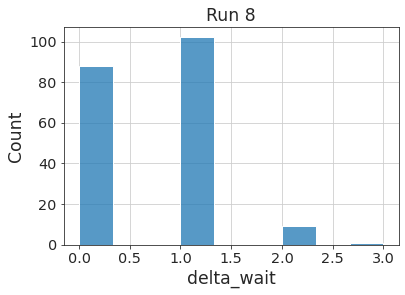

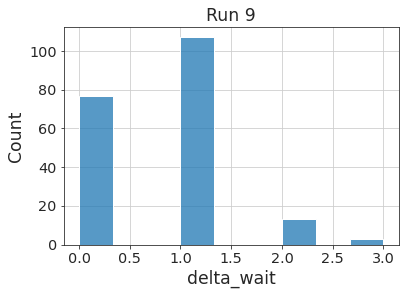

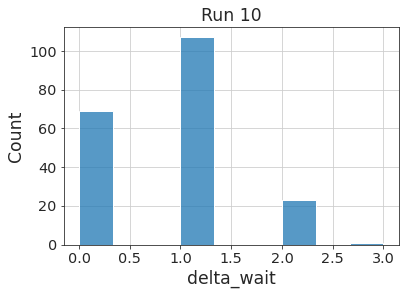

In [196]:
# Plot histogram
for j in range(10):

    x = list_compare_wait[j].delta_wait
    
    sns.histplot(list_compare_wait[j].delta_wait)
    
    plt.title(f"Run {j+1}")
    plt.show()

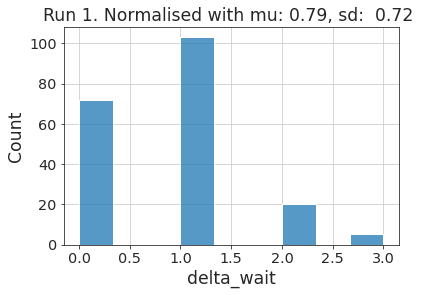

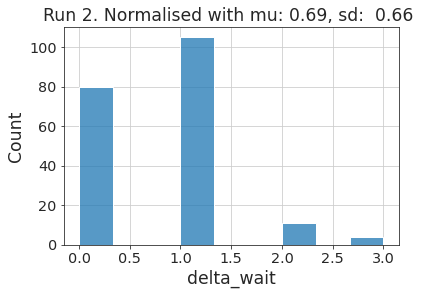

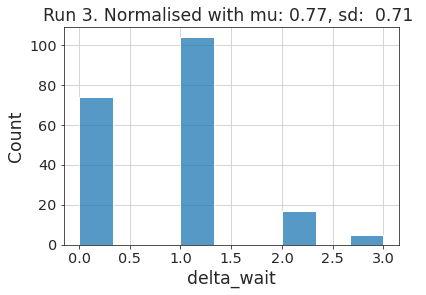

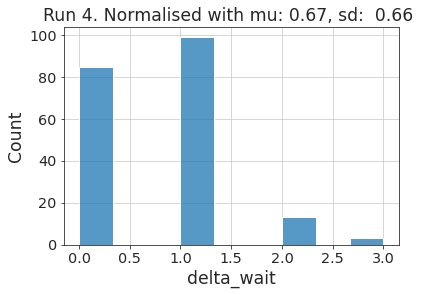

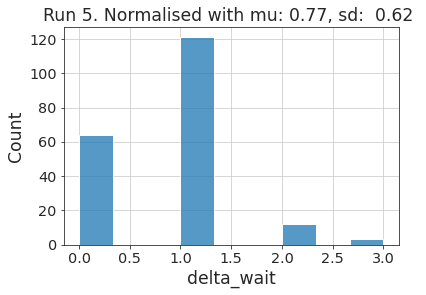

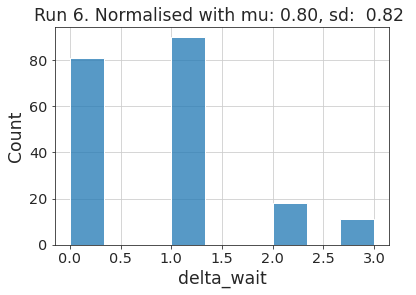

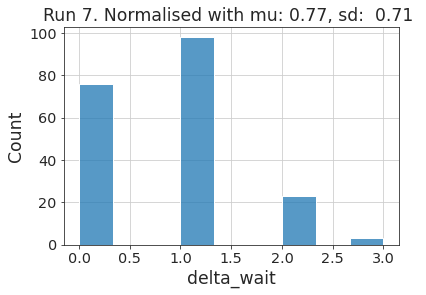

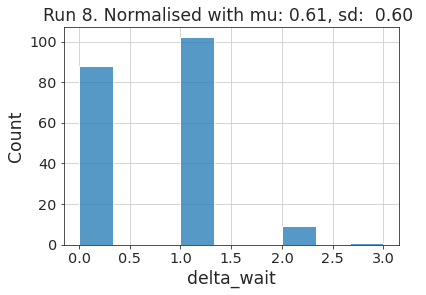

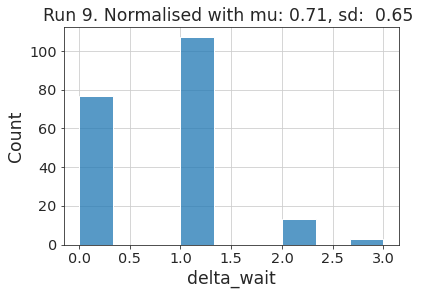

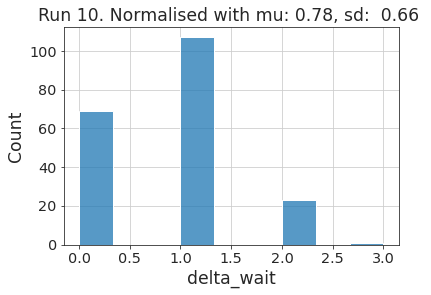

In [197]:
# Plot normalised histogram
for j in range(10):
    x = list_compare_wait[j].delta_wait
    mu_x = np.mean(x)
    sd_x = np.nanstd(x)
    x_norm = (x - mu_x) / sd_x
    
    sns.histplot(list_compare_wait[j].delta_wait)
    
    plt.title(f"Run {j+1}. Normalised with mu: {mu_x:.2f}, sd: {sd_x: .2f} ")
    plt.show()

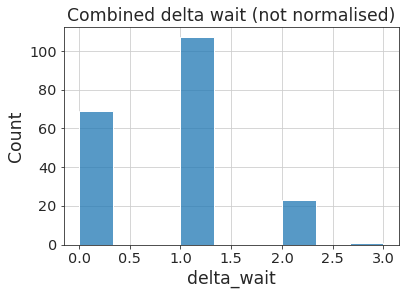

In [198]:
# Plot normalised histogram
combined_x = []
for j in range(10):
    x = list_compare_wait[j].delta_wait
    mu_x = np.mean(x)
    sd_x = np.nanstd(x)
    x_norm = (x - mu_x) / sd_x
    combined_x = x
    
sns.histplot(combined_x)
plt.title(f"Combined delta wait (not normalised)")
plt.show()

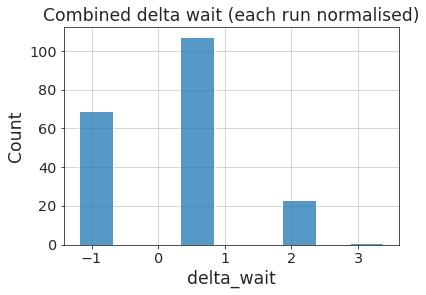

In [199]:
# Plot normalised histogram
combined_x = []
for j in range(10):
    x = list_compare_wait[j].delta_wait
    mu_x = np.mean(x)
    sd_x = np.nanstd(x)
    x_norm = (x - mu_x) / sd_x
    combined_x = x_norm
    
sns.histplot(combined_x)
plt.title(f"Combined delta wait (each run normalised)")
plt.show()

#### Jitter PE Time Plot

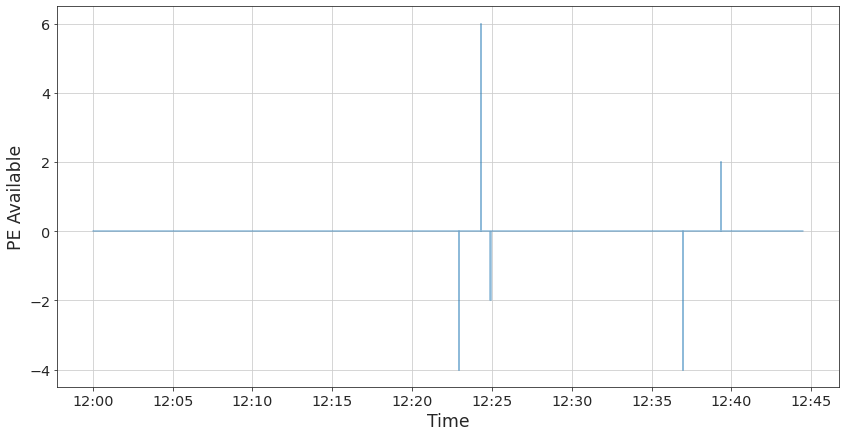

In [200]:
n = 200

fig, ax = plt.subplots(figsize=[14,7])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# runs=range(0,10)
runs = [1]

for j in runs:
    st_petime = dic_st_petime[j]
    st_petime['RunType'] = 'slurmtrain'
    st_petime['SchedType'] = 'FIFO'

    sala_petime = dic_sala_petime[j]
    sala_petime['RunType'] = 'salabim'
    sala_petime['SchedType'] = 'FIFO'

    # Only show first n jobs
    st_petime = st_petime.loc[0:2*n].copy()
    sala_petime = sala_petime.loc[0:2*n].copy()
    
    # Plot
    ax.step(st_petime.event_time, 
        st_petime.pe_avail - sala_petime.pe_avail,
        where='post',
        label = f"SlurmTrain Run {j+1} Difference: Prio - Prio2",
        alpha=.5)
    
# ax.legend()
ax.set_xlabel('Time')
# ax.set_ylabel(r'PE Available / Max PE')
ax.set_ylabel('PE Available')

plt.show()

In [201]:
# IDEA FOR FOLLOW UP GRAPH :  batch file job run times vs actual run times ... I think slurm takes longer to quit a job. And possibly to start a job.

### Volgende probeerslae

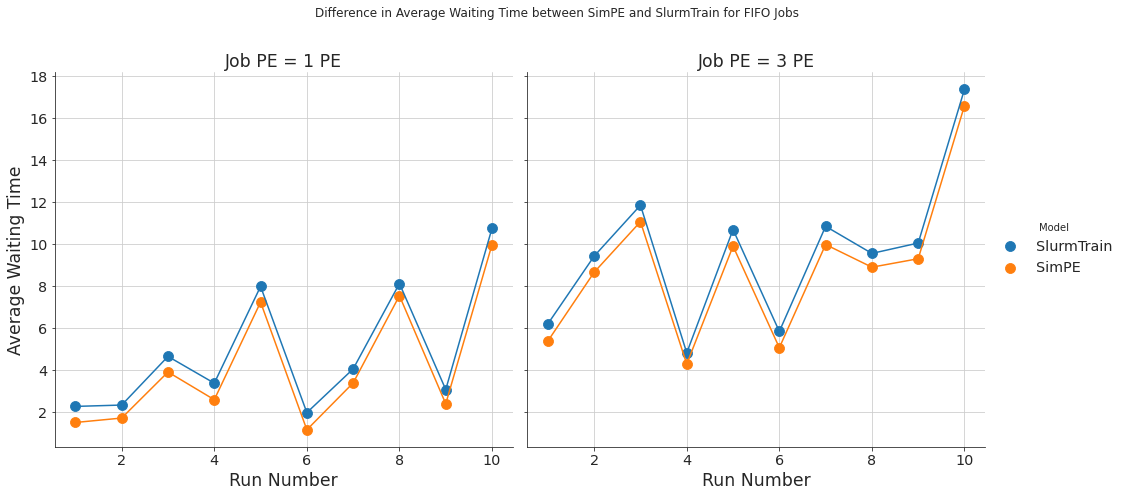

In [202]:
# Plot the wait times over the 10 runs

import matplotlib.pyplot as plt
import seaborn as sns

# Set a grid layout
sns.set_style("ticks", {'axes.grid' : True})

g = sns.FacetGrid(df_plot, 
                  col="Job PE", 
                  hue="Model", 
                  height=7, 
                  aspect=1, 
                  palette="tab10")

# Draw line plot
g.map(sns.lineplot, "RunNum", "wait_time_mean")

# Draw scatter plots (dot plots) with circle markers
g.map(sns.scatterplot, "RunNum", "wait_time_mean", 
      s=100, 
      edgecolor=None, 
      marker="o")

# Add a legend
g.add_legend()

# Set plot title and labels
g.set_axis_labels("Run Number", "Average Waiting Time")
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Difference in Average Waiting Time between SimPE and SlurmTrain for FIFO Jobs')

plt.show()

In [203]:
# from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
# from plotnine.data import mtcars

# (ggplot(mtcars, aes("wt", "mpg", color="factor(gear)"))
#  + geom_point()
#  + stat_smooth(method="lm")
#  + facet_wrap("~gear"))

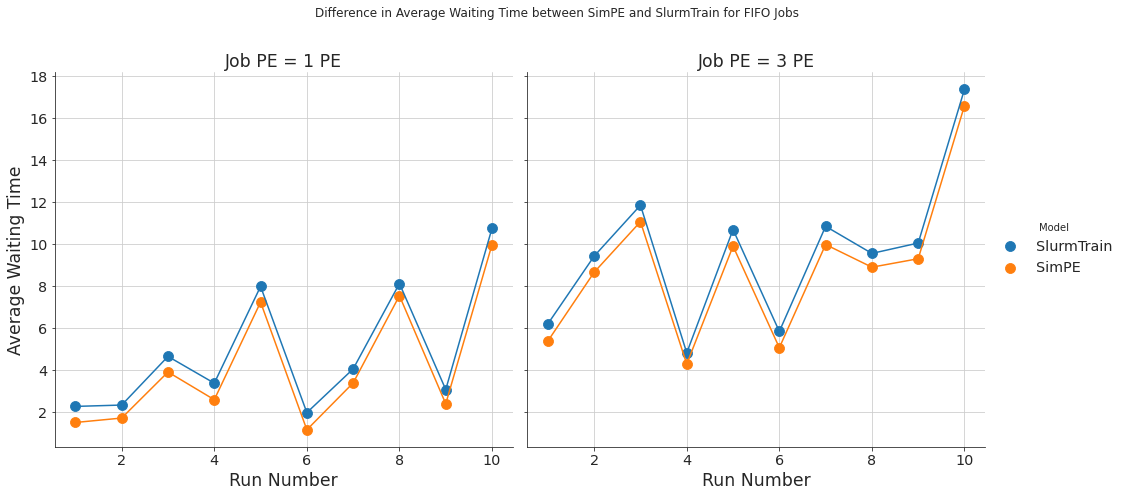

In [204]:
# Plot the wait times over the 10 runs

import matplotlib.pyplot as plt
import seaborn as sns

# Set a grid layout
sns.set_style("ticks", {'axes.grid' : True})

g = sns.FacetGrid(df_plot, 
                  col="Job PE", 
                  hue="Model", 
                  height=7, 
                  aspect=1, 
                  palette="tab10")

# Draw line plot
g.map(sns.lineplot, "RunNum", "wait_time_mean")

# Draw scatter plots (dot plots) with circle markers
g.map(sns.scatterplot, "RunNum", "wait_time_mean", 
      s=100, 
      edgecolor=None, 
      marker="o")

# Add a legend
g.add_legend()

# Set plot title and labels
g.set_axis_labels("Run Number", "Average Waiting Time")
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Difference in Average Waiting Time between SimPE and SlurmTrain for FIFO Jobs')

plt.show()

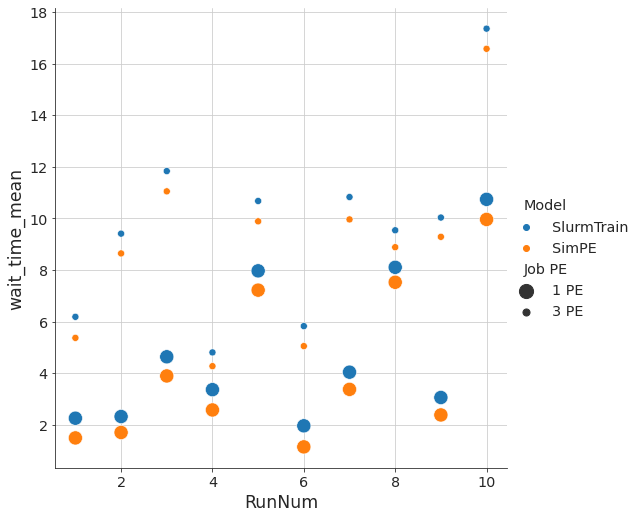

In [205]:
sns.relplot(data = df_plot,
            x="RunNum",
            y="wait_time_mean",
#              col = "Job PE",
            size = "Job PE",
            sizes = (50,200),
            hue="Model",
            height=7,
            aspect=1,
            kind = "scatter"
            )

plt.show()

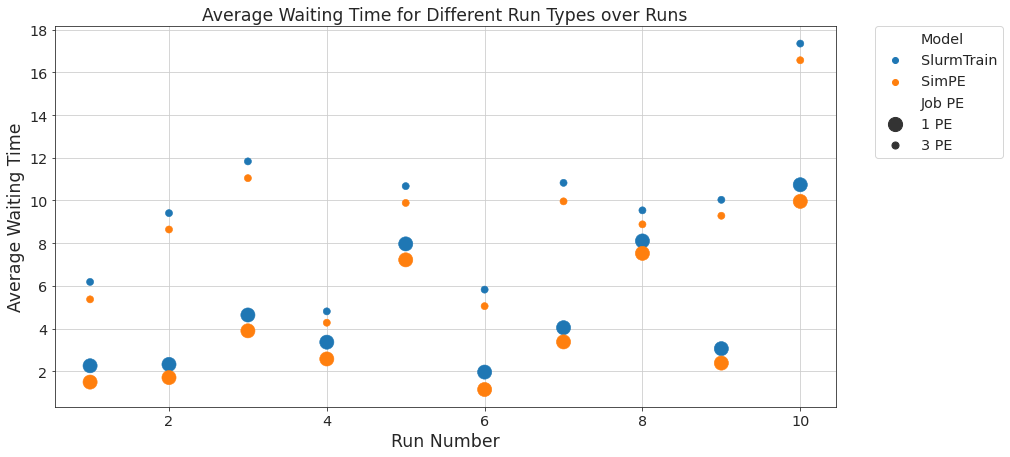

In [206]:
# Create a scatter plot
plt.figure(figsize=(14, 7))

sns.set_style("ticks", {'axes.grid' : True})
sns.scatterplot(x="RunNum", 
                y="wait_time_mean", 
                hue="Model", 
                size="Job PE", 
                sizes=(50, 200), 
                data=df_plot, 
                palette="tab10", 
                edgecolor=None, marker="o")

# Set plot title and labels
plt.title('Average Waiting Time for Different Run Types over Runs')
plt.xlabel('Run Number')
plt.ylabel('Average Waiting Time')

# Add a legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

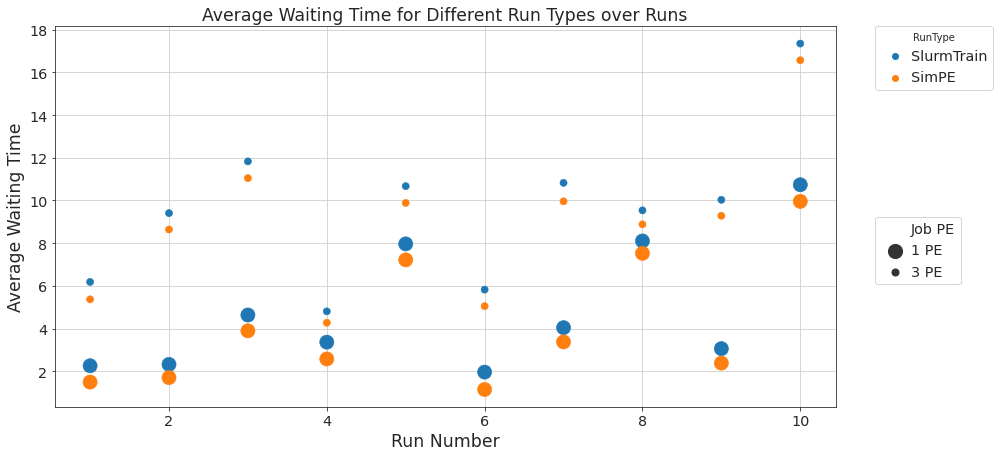

In [207]:
# Create a scatter plot
plt.figure(figsize=(14, 7))

scatter = sns.scatterplot(x="RunNum", 
                          y="wait_time_mean", 
                          hue="Model", 
                          size="Job PE", 
                          sizes=(50, 200), 
                          data=df_plot, 
                          palette="tab10", 
                          edgecolor=None, 
                          marker="o")

# Set plot title and labels
plt.title('Average Waiting Time for Different Run Types over Runs')
plt.xlabel('Run Number')
plt.ylabel('Average Waiting Time')

# Handle the legend: split it into two parts
handles, labels = scatter.get_legend_handles_labels()

# Show legend for RunType
legend1 = plt.legend(handles=handles[1:3], labels=labels[1:3], title="RunType", bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handletextpad=0.1)
plt.gca().add_artist(legend1)

# Show legend for job_pe_req
plt.legend(handles=handles[3:], labels=labels[3:], title="", bbox_to_anchor=(1.05, 0.5), loc=2, borderaxespad=0., handletextpad=0.1)

plt.show()

## Junk

In [208]:
rng = np.random.default_rng()
rng

Generator(PCG64) at 0x7F9C50788B88

In [209]:
# # T-test example

# rvs1 = stats.expon.rvs(loc=10,size=100,random_state=rng)
# rvs2 = (rvs1stats.expon.rvs(loc=10,size=100,random_state=rng)
#        )
#         # rvs1[1] = np.nan
# a = stats.ttest_rel(rvs1, rvs2)

# print(a.statistic)
# print(a.pvalue)

In [210]:
# rvs1

In [211]:
# rvs2

In [212]:
# %run ./srun8_slurmtrain.ipynb